In [2]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
df = read_csv('predict/weatherKZZM.csv', usecols=[0, 3, 4, 5, 6,7,8], engine='python') 

import warnings
print(df.head())
warnings.filterwarnings("ignore")

2024-10-02 20:37:29.044518: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 20:37:30.443680: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 20:37:30.739638: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-02 20:37:43.570723: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


       Date  Humidity(Day)  Humidity(Night)  Temperature(Day)  \
0  1/1/2024             82               53              30.2   
1  1/2/2024             82               60              30.0   
2  1/3/2024             82               60              30.2   
3  1/4/2024             82               72              30.2   
4  1/5/2024             82               60              29.6   

   Temperature(Night)  Carbon(Day)  Carbon(Night)  
0                14.4          347            354  
1                14.2          336            376  
2                14.5          348            402  
3                14.4          384            423  
4                14.8          398            450  


In [3]:
df.Date =  pd.to_datetime(df.Date)
df = df.set_index("Date")

In [4]:
train,test = df[:-7] ,df[-7:]
train_scaler = MinMaxScaler()
test_scaler = MinMaxScaler()
train_scaler.fit(train)
test_scaler.fit(test)
train =train_scaler.transform(train)
test = test_scaler.transform(test)

In [5]:
n_input = 7
n_features = 6
generator = TimeseriesGenerator(train,train,length=n_input,batch_size=32)#6
model = Sequential()
model.add(LSTM(150,activation="relu", input_shape=(n_input,n_features)))
model.add(Dropout(0.5));
model.add(Dense(6))
model.compile(optimizer="adam", loss="mse")
model.fit(generator, epochs=1500)

Epoch 1/1500
7/7 [==============================] - 8s 82ms/step - loss: 0.3212
Epoch 2/1500
7/7 [==============================] - 0s 16ms/step - loss: 0.1578
Epoch 3/1500
7/7 [==============================] - 0s 14ms/step - loss: 0.0841
Epoch 4/1500
7/7 [==============================] - 0s 15ms/step - loss: 0.0796
Epoch 5/1500
7/7 [==============================] - 0s 15ms/step - loss: 0.0748
Epoch 6/1500
7/7 [==============================] - 0s 13ms/step - loss: 0.0695
Epoch 7/1500
7/7 [==============================] - 0s 16ms/step - loss: 0.0553
Epoch 8/1500
7/7 [==============================] - 0s 18ms/step - loss: 0.0594
Epoch 9/1500
7/7 [==============================] - 0s 17ms/step - loss: 0.0531
Epoch 10/1500
7/7 [==============================] - 0s 12ms/step - loss: 0.0499
Epoch 11/1500
7/7 [==============================] - 0s 9ms/step - loss: 0.0448
Epoch 12/1500
7/7 [==============================] - 0s 10ms/step - loss: 0.0491
Epoch 13/1500
7/7 [===================

In [6]:
pred_list = []
import numpy as np
batch = train[-n_input:].reshape((1,n_input,n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

1/1 [==============================] - 0s 45ms/step


In [7]:
df_predict = pd.DataFrame(train_scaler.inverse_transform(pred_list),index=df[-n_input:].index,columns=["Humidity(Day) Predict","Humidity(Night) Predict","Temperature(Day) Predict","Temperature(Night) Predict","Carbon(Day) Predict","Carbon(Night) Predict"]).round(1)

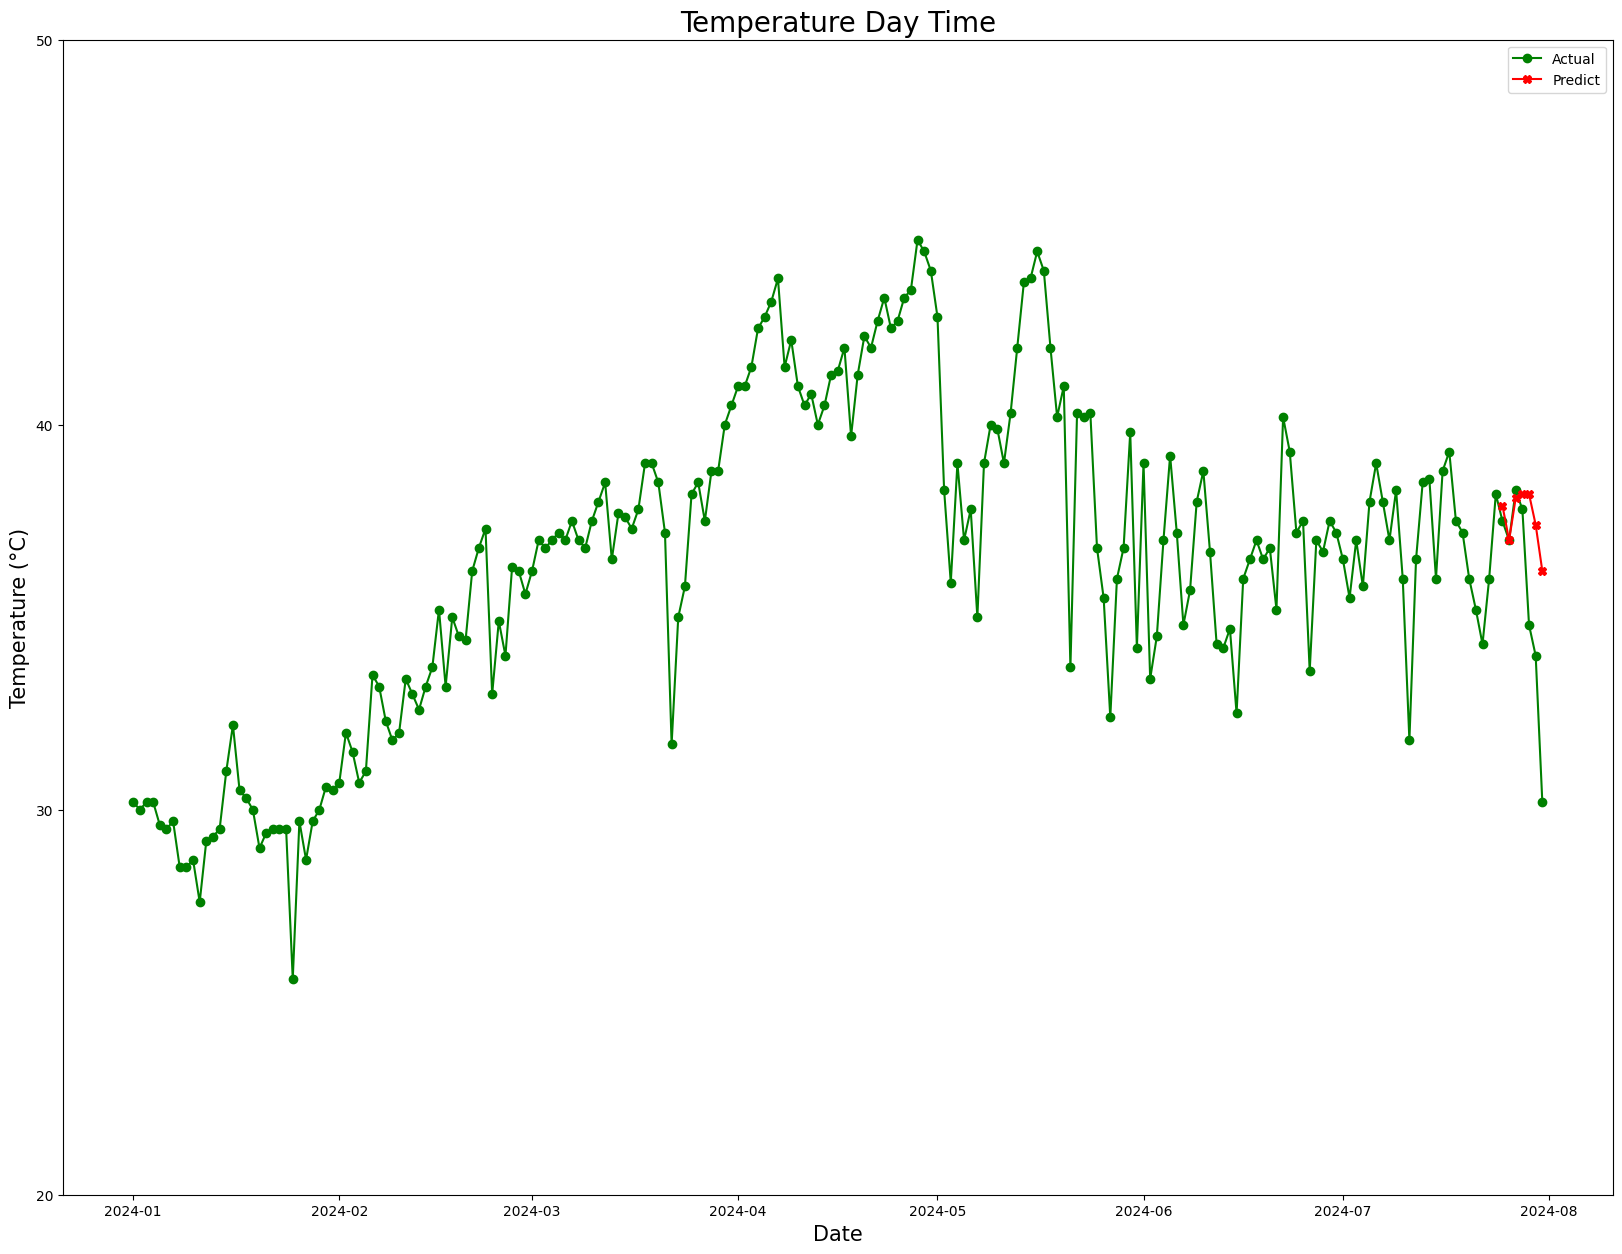

In [9]:
plt.figure(figsize=(20, 15))
plt.plot(df_test.index, df_test["Temperature(Day)"], label="Actual", color='g', marker='o')
plt.plot(df_test.index, df_test["Temperature(Day) Predict"], label="Predict", color='r', marker='X')
plt.title('Temperature Day Time', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=15)
min_temp = df_test["Temperature(Day)"].min() // 10 * 10  # Round down to nearest 10
max_temp = df_test["Temperature(Day)"].max() // 10 * 10 + 10  # Round up to nearest 10
plt.yticks(range(int(min_temp), int(max_temp) + 1, 10))  # Create ticks from min to max with step of 10
plt.legend()
plt.show()

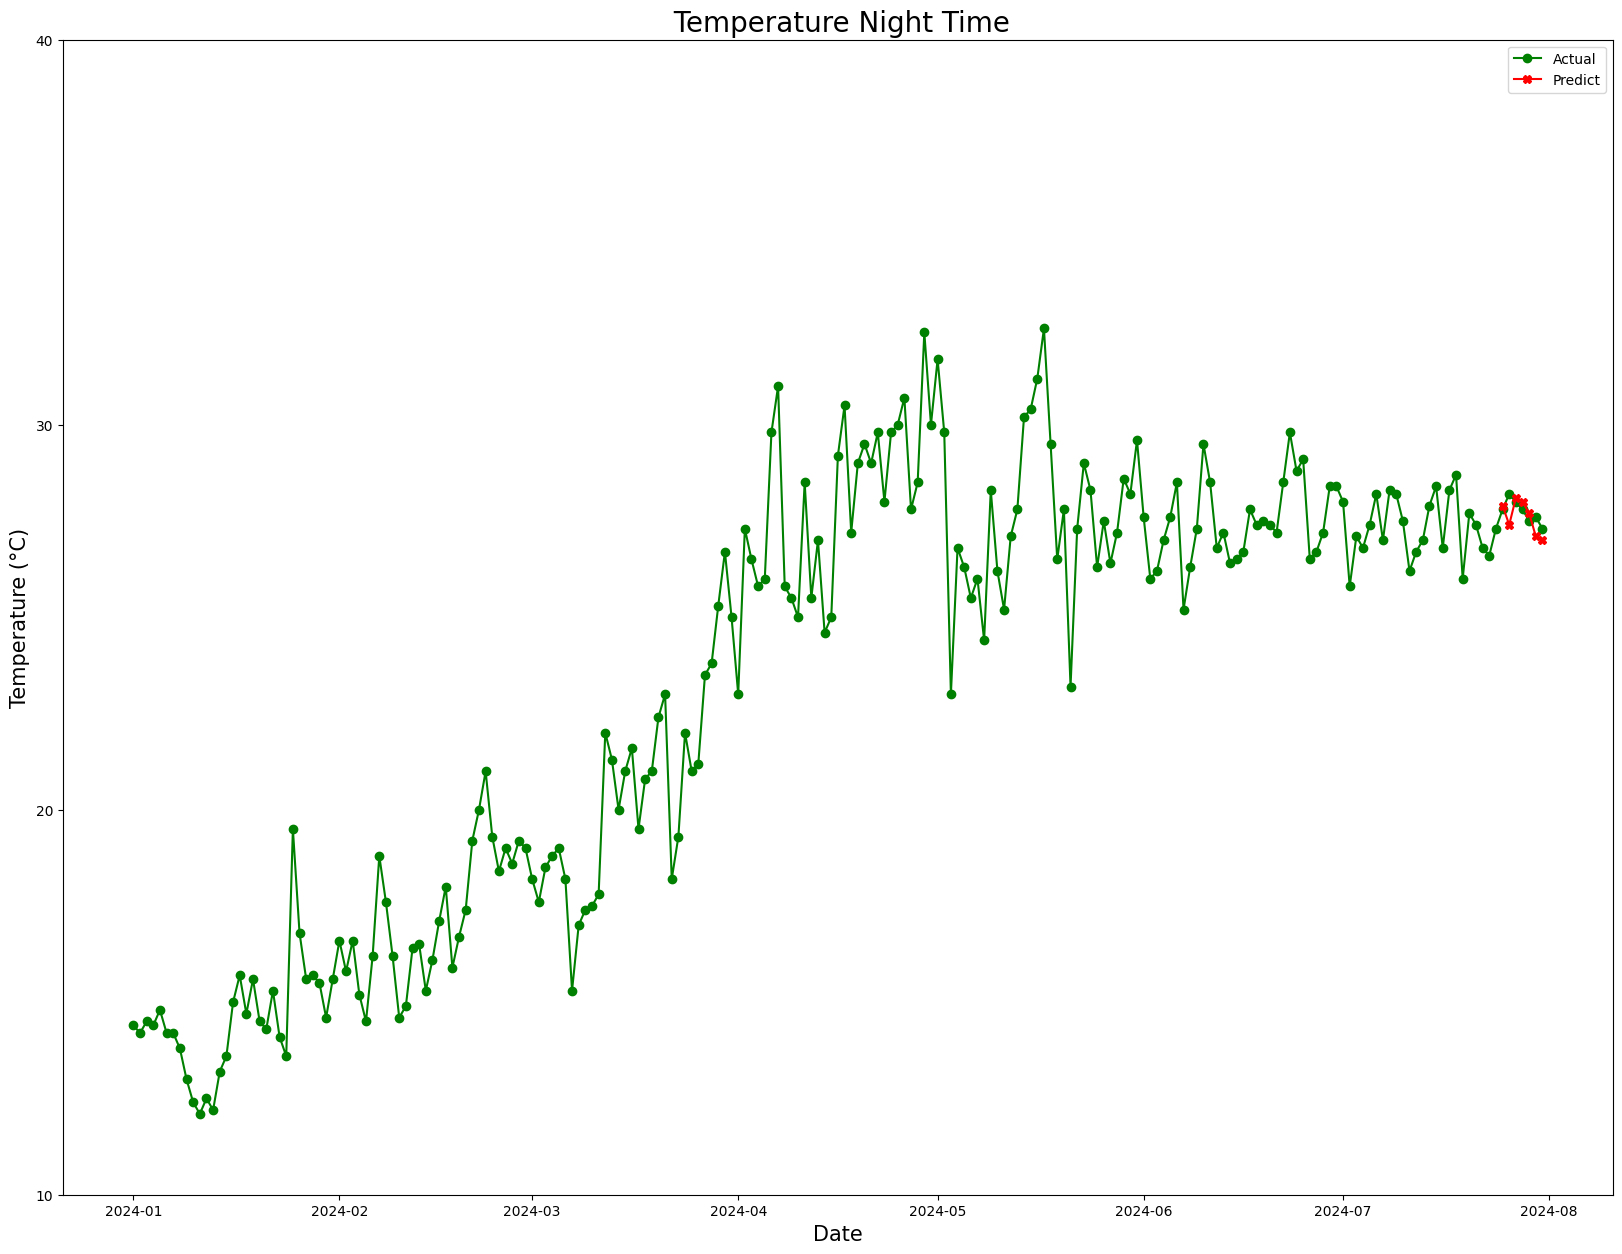

In [10]:
plt.figure(figsize=(20,15))
plt.plot(df_test.index,df_test["Temperature(Night)"], label="Actual",color='g',marker='o')
plt.plot(df_test.index,df_test["Temperature(Night) Predict"], label="Predict",color='r',marker='X')
plt.title(' Temperature Night Time', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=15)
min_temp = df_test["Temperature(Night)"].min() // 10 * 10  # Round down to nearest 10
max_temp = df_test["Temperature(Night)"].max() // 10 * 10 + 10  # Round up to nearest 10
plt.yticks(range(int(min_temp), int(max_temp) + 1, 10))  # Create ticks from min to max with step of 10
plt.legend()
plt.show()

In [8]:
df_test = pd.concat([df,df_predict],axis=1)
df_test.tail(7)

,Humidity(Day),Humidity(Night),Temperature(Day),Temperature(Night),Carbon(Day),Carbon(Night),Humidity(Day) Predict,Humidity(Night) Predict,Temperature(Day) Predict,Temperature(Night) Predict,Carbon(Day) Predict,Carbon(Night) Predict
Date,,,,,,,,,,,,
2024-07-25,65,56,37.5,27.8,398,450,63.7,51.5,37.9,27.9,413.2,591.1
2024-07-26,65,61,37.0,28.2,450,604,70.1,55.0,37.0,27.4,413.1,568.4
2024-07-27,61,56,38.3,28.0,460,512,66.7,50.8,38.1,28.1,424.3,562.2
2024-07-28,65,50,37.8,27.8,487,550,64.9,49.7,38.2,28.0,422.7,549.1
2024-07-29,65,65,34.8,27.5,490,570,65.3,49.0,38.2,27.7,423.7,534.4
2024-07-30,70,64,34.0,27.6,469,590,73.4,49.5,37.4,27.1,401.4,479.4
2024-07-31,77,79,30.2,27.3,431,578,69.5,52.9,36.2,27.0,391.2,444.2


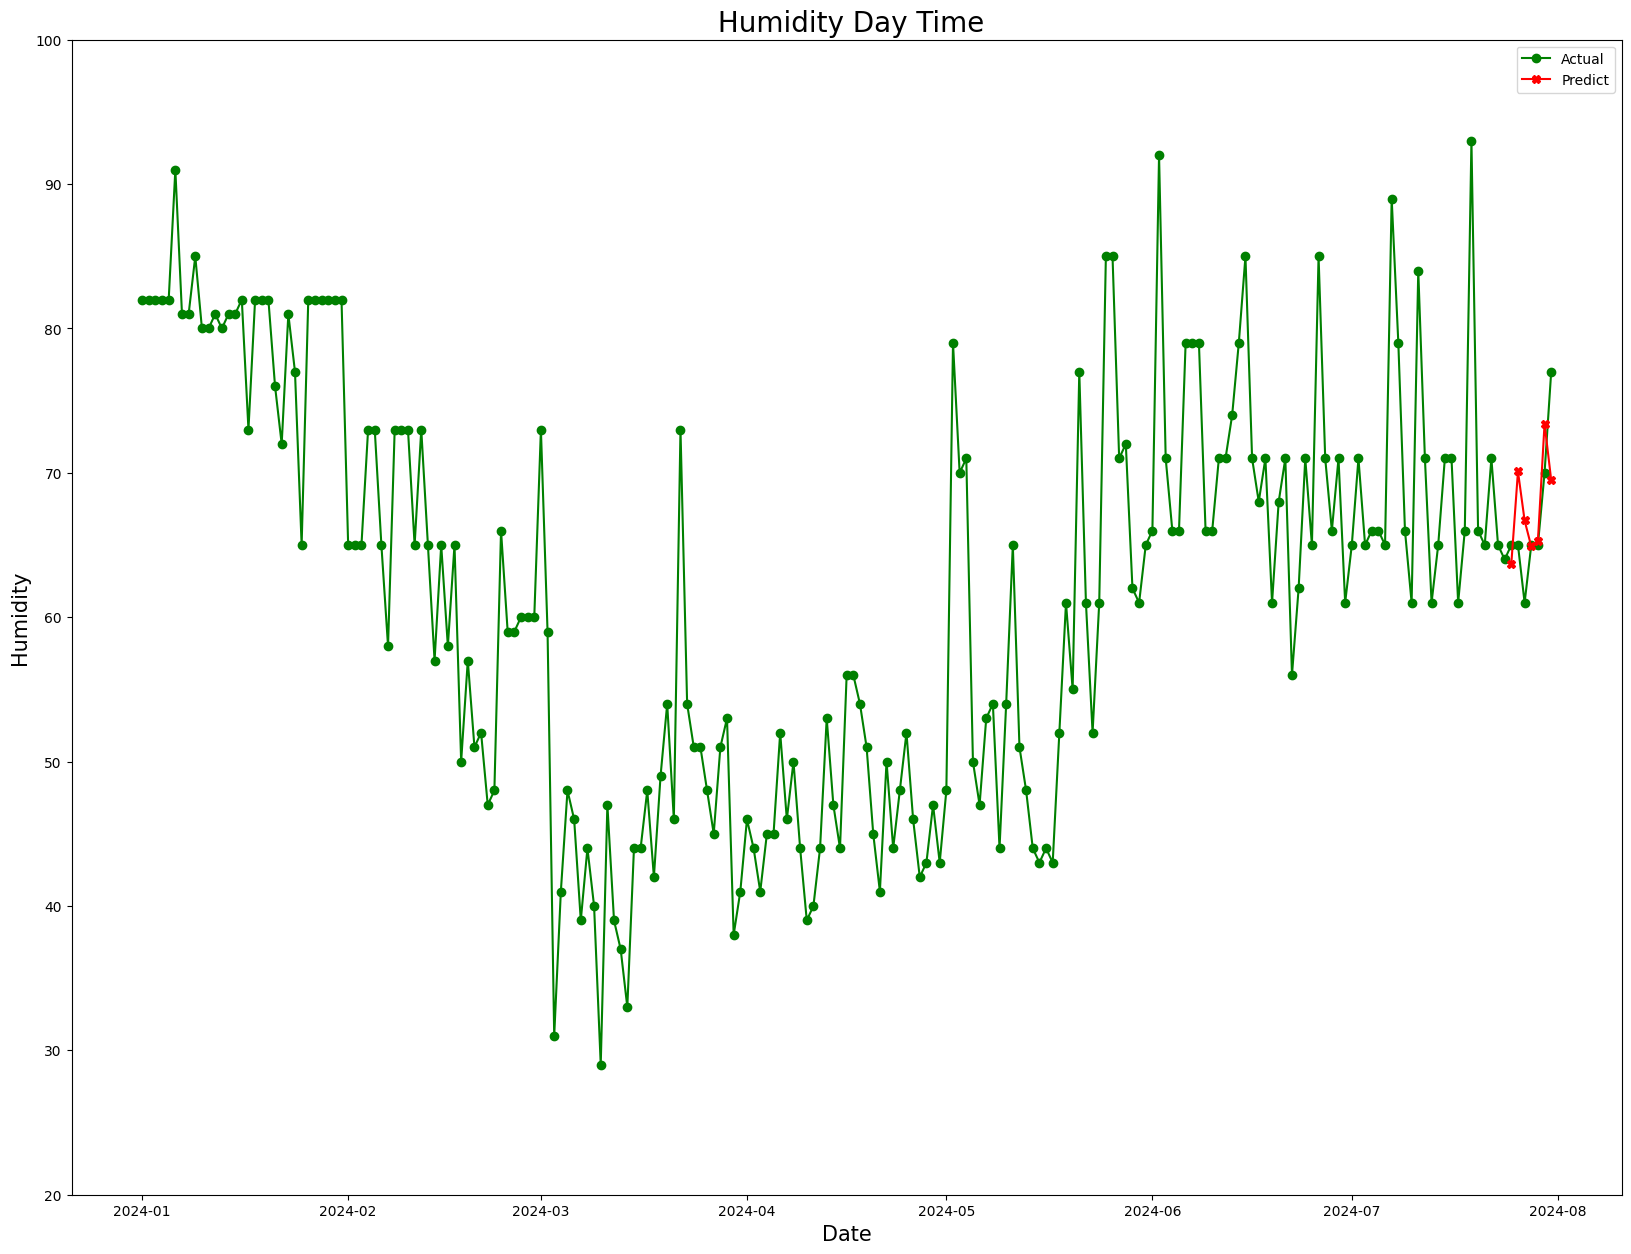

In [11]:
plt.figure(figsize=(20,15))
plt.plot(df_test.index,df_test["Humidity(Day)"], label="Actual",color='g',marker='o')
plt.plot(df_test.index,df_test["Humidity(Day) Predict"], label="Predict",color='r',marker='X')
plt.title(' Humidity Day Time', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Humidity', fontsize=15)
min_humi = df_test["Humidity(Day)"].min() // 10 * 10  # Round down to nearest 10
max_humi = df_test["Humidity(Day)"].max() // 10 * 10 + 10  # Round up to nearest 10
plt.yticks(range(int(min_humi), int(max_humi) + 1, 10))  # Create ticks from min to max with step of 10
plt.legend()
plt.show()

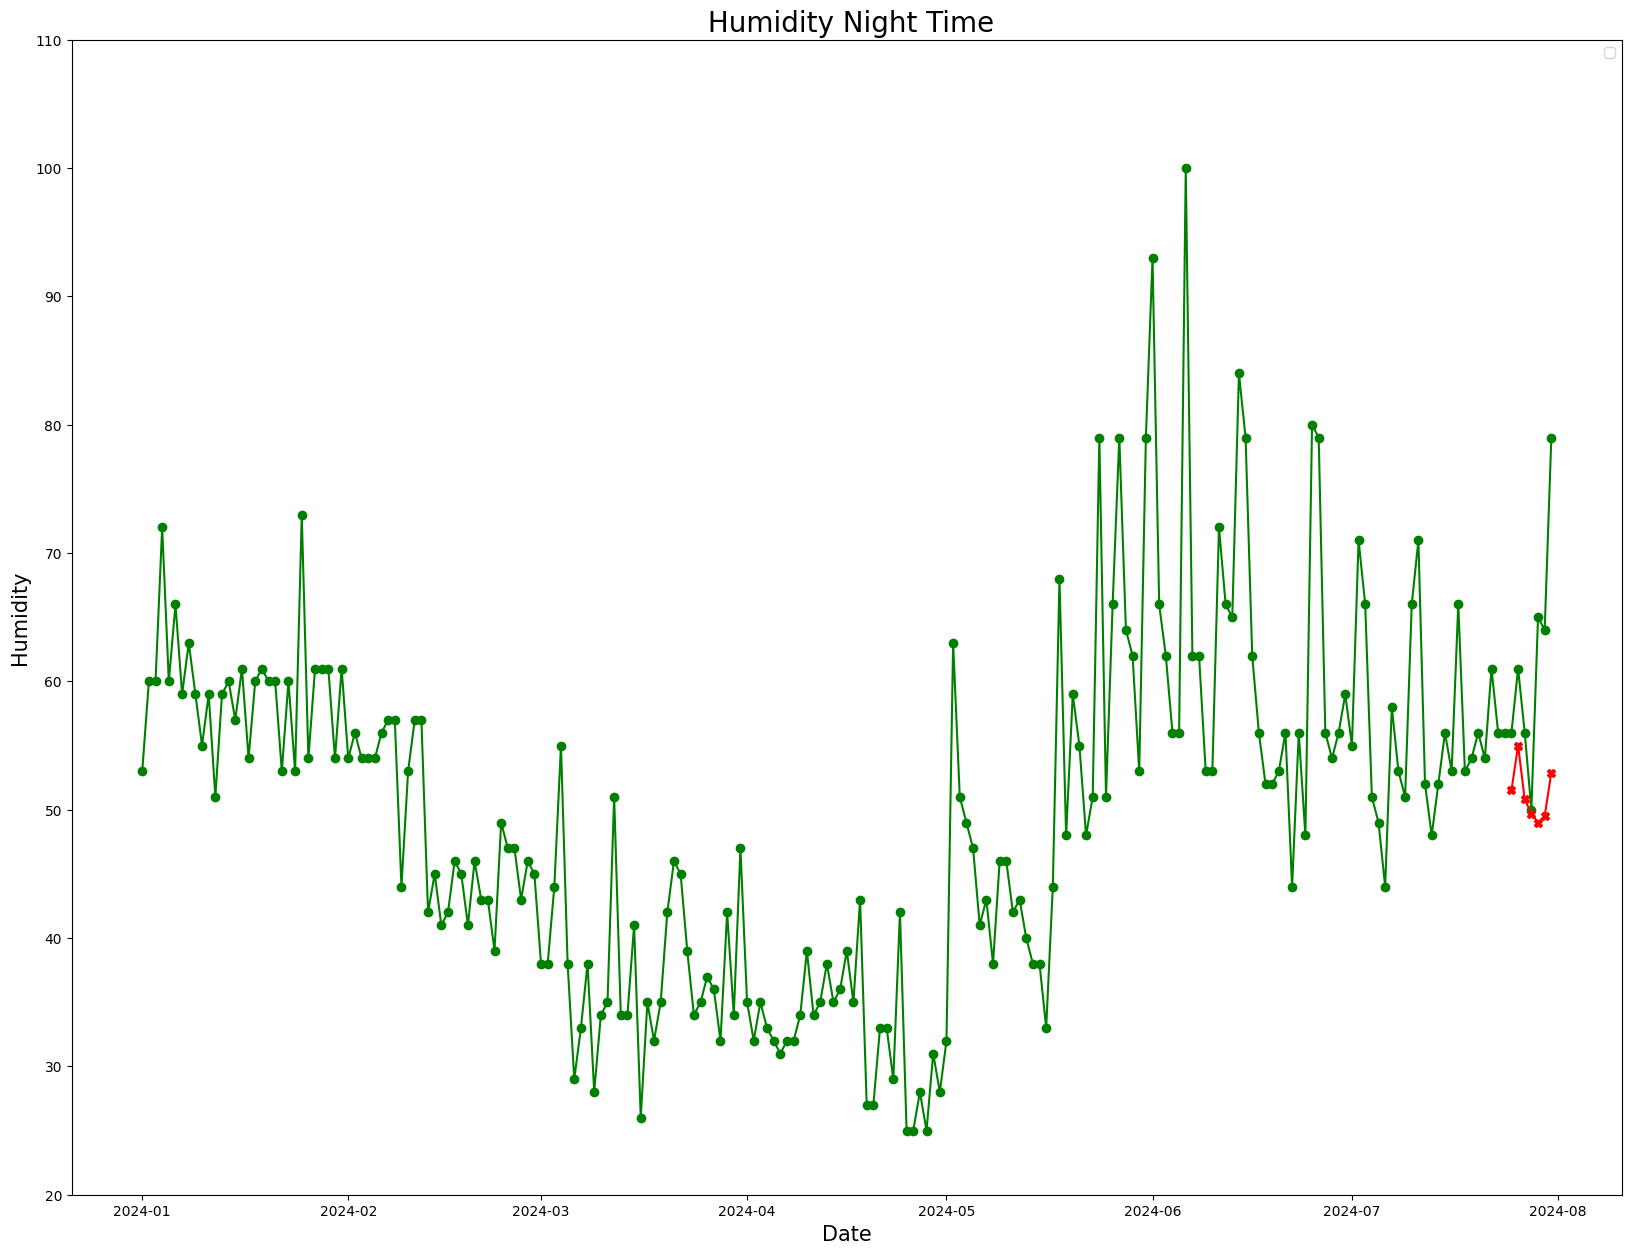

In [12]:
plt.figure(figsize=(20,15))
plt.plot(df_test.index,df_test["Humidity(Night)"],color='g',marker='o')
plt.plot(df_test.index,df_test["Humidity(Night) Predict"],color='r',marker='X')
plt.title(' Humidity Night Time', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Humidity', fontsize=15)
min_humi = df_test["Humidity(Night)"].min() // 10 * 10  # Round down to nearest 10
max_humi = df_test["Humidity(Night)"].max() // 10 * 10 + 10  # Round up to nearest 10
plt.yticks(range(int(min_humi), int(max_humi) + 1, 10))  # Create ticks from min to max with step of 10
plt.legend()
plt.show()

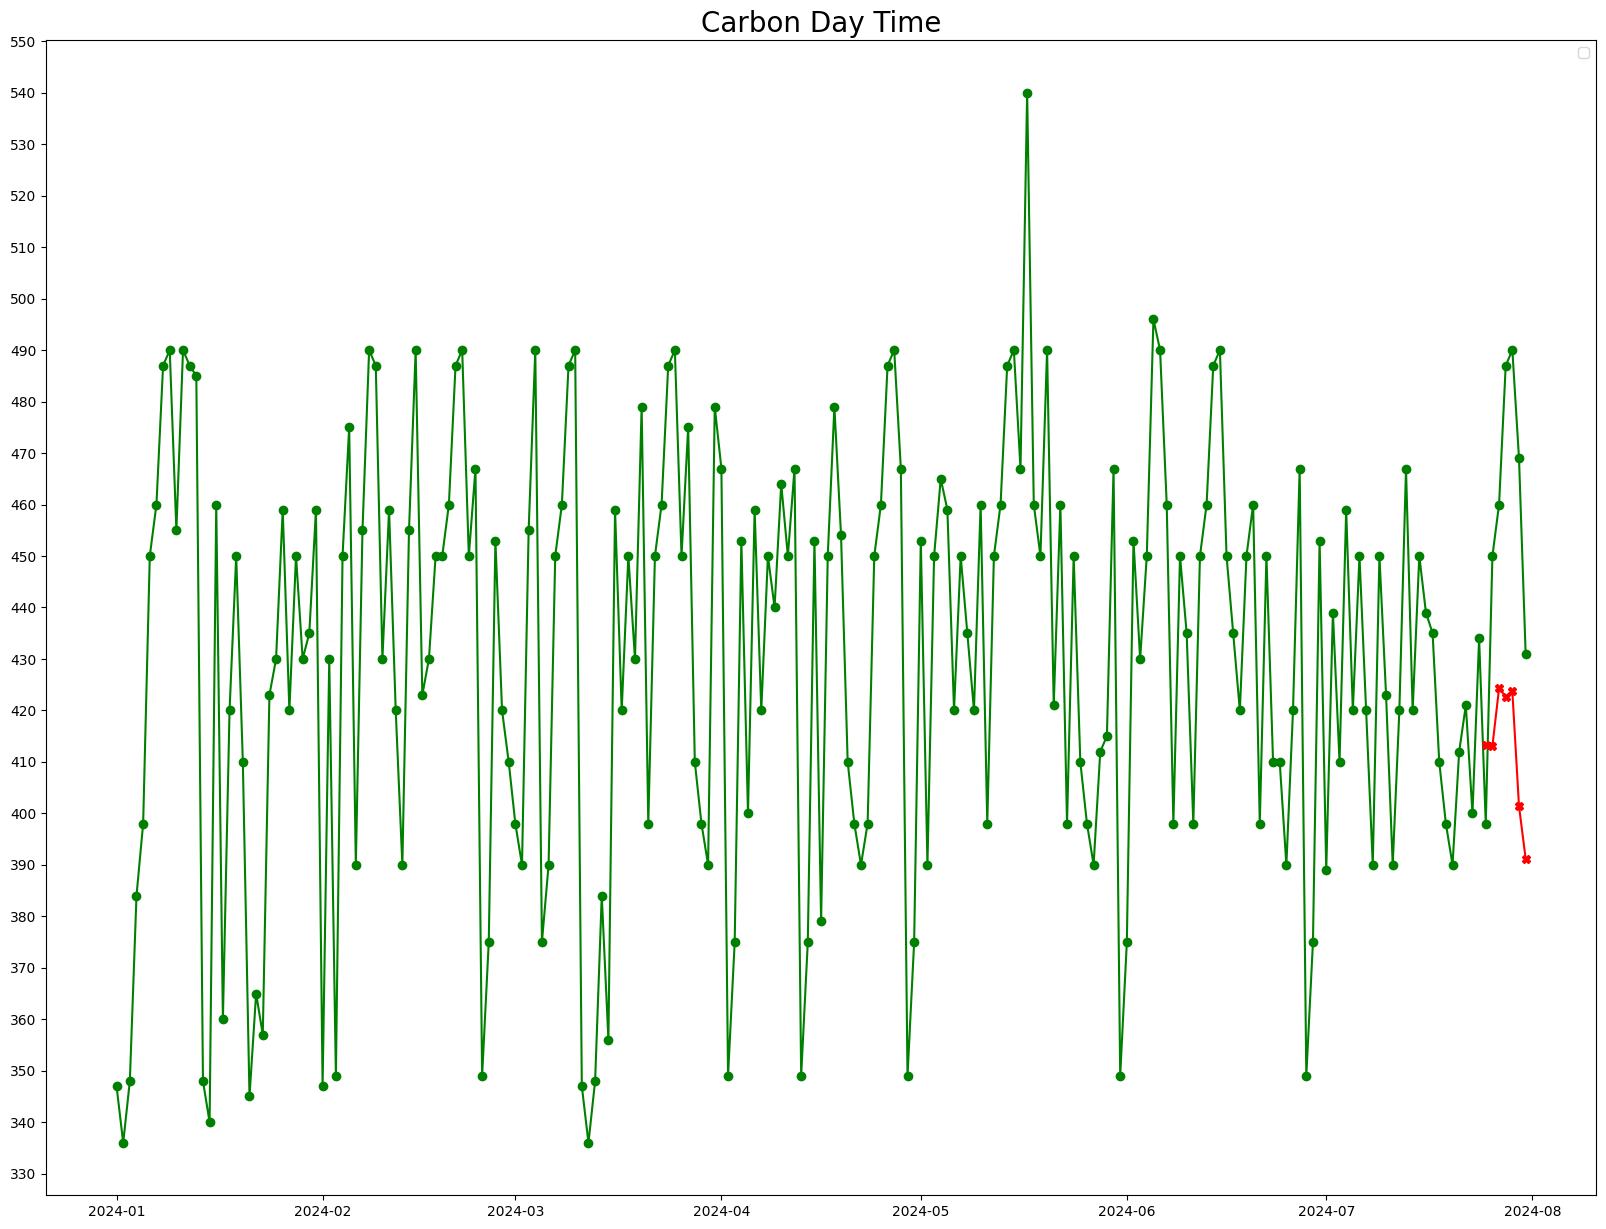

In [13]:
plt.figure(figsize=(20,15))
plt.plot(df_test.index,df_test["Carbon(Day)"],color='g',marker='o')
plt.plot(df_test.index,df_test["Carbon(Day) Predict"],color='r',marker='X')
plt.legend()
plt.title('Carbon Day Time', fontsize=20)
min_carbon = df_test["Carbon(Day)"].min() // 10 * 10  # Round down to nearest 10
max_carbon = df_test["Carbon(Day)"].max() // 10 * 10 + 10  # Round up to nearest 10
plt.yticks(range(int(min_carbon), int(max_carbon) + 1, 10))  # Create ticks from min to max with step of 10
plt.legend()
plt.show()

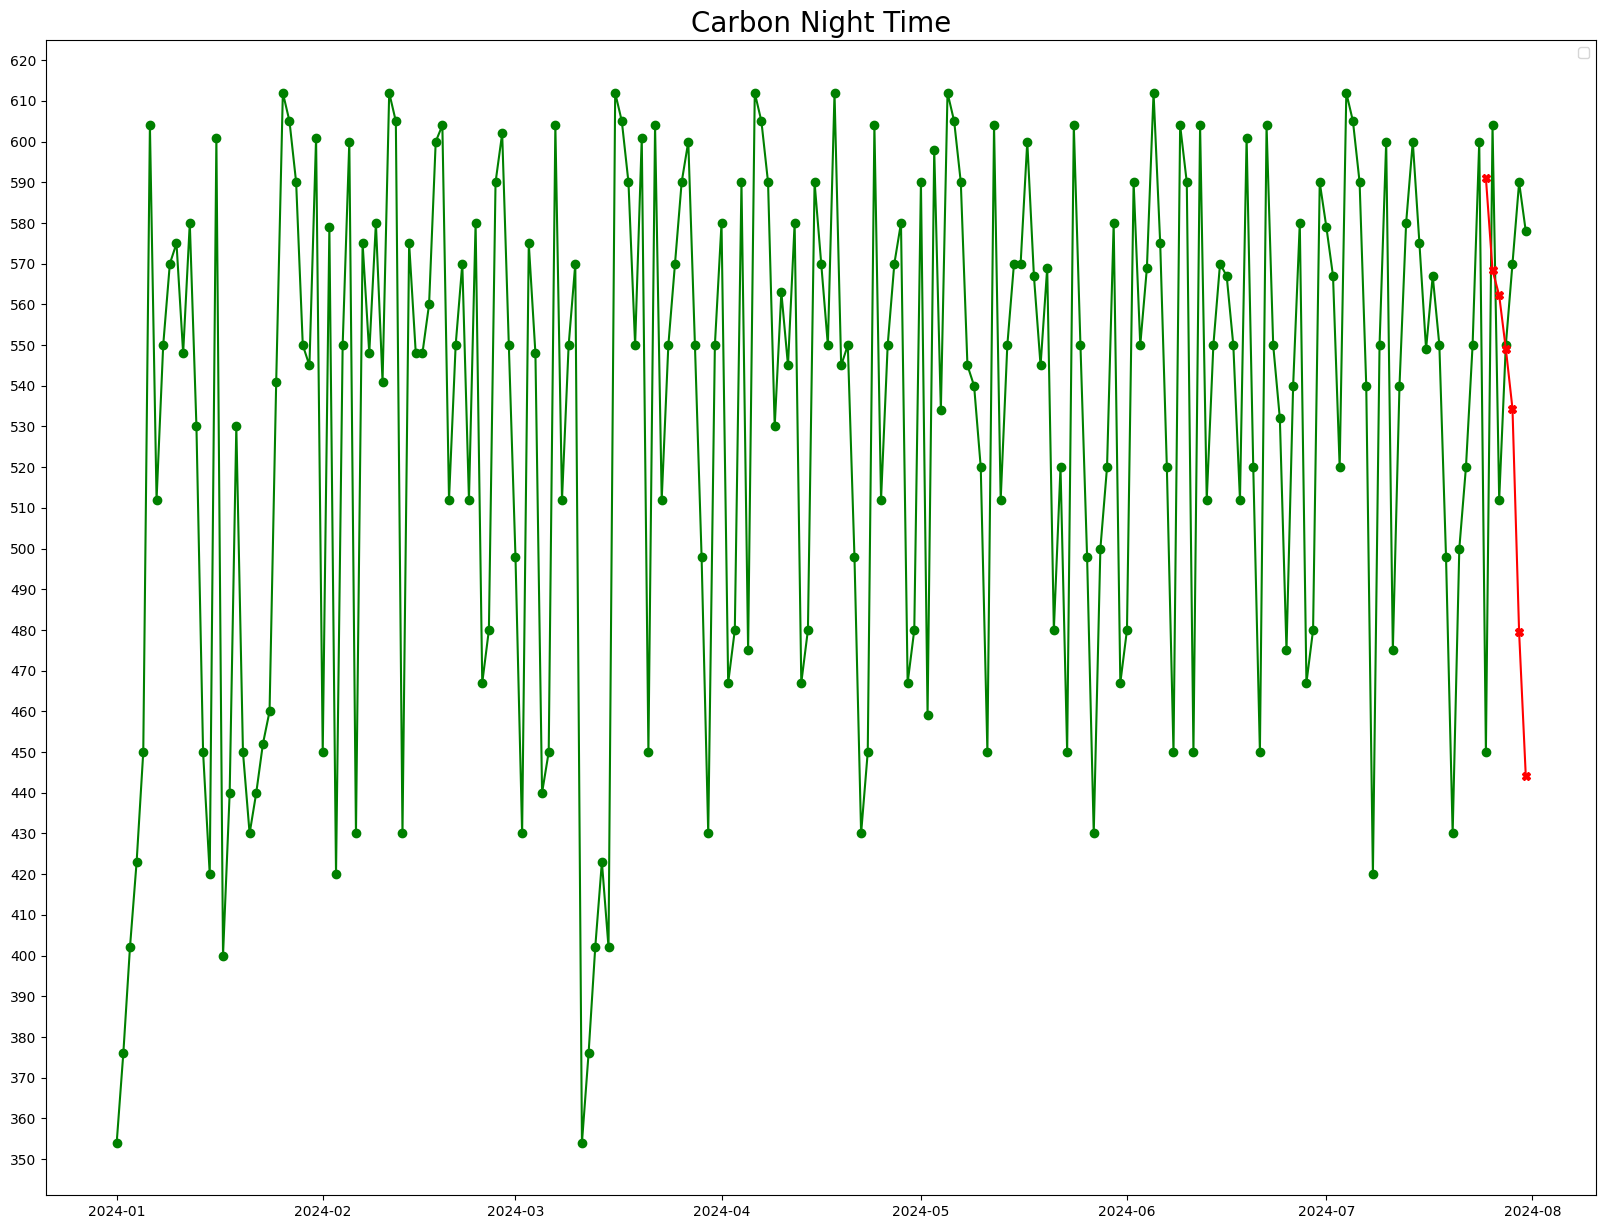

In [14]:
plt.figure(figsize=(20,15))
plt.plot(df_test.index,df_test["Carbon(Night)"],color='g',marker='o')
plt.plot(df_test.index,df_test["Carbon(Night) Predict"],color='r',marker='X')
plt.title('Carbon Night Time', fontsize=20)
plt.title('Carbon Night Time', fontsize=20)
min_carbon = df_test["Carbon(Night)"].min() // 10 * 10  # Round down to nearest 10
max_carbon = df_test["Carbon(Night)"].max() // 10 * 10 + 10  # Round up to nearest 10
plt.yticks(range(int(min_carbon), int(max_carbon) + 1, 10))  # Create ticks from min to max with step of 10
plt.legend()
plt.show()